In [1]:
import pandas as pd
file = 'US_Accidents.csv'
df = pd.read_csv(file)
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

In [2]:
# valeurs manquantes par colonne
valeurs_nulles = df.isnull().sum()
taux_valeurs_nulles = round((df.isnull().sum() / len(df)) * 100, 2)

df_nulles = pd.DataFrame({
    'Colonne': valeurs_nulles.index,
    'Nb_Manquants': valeurs_nulles.values,
    'Pourcentage': taux_valeurs_nulles.values
}).sort_values('Nb_Manquants', ascending=False)

print(df_nulles[df_nulles['Nb_Manquants'] > 0])

                  Colonne  Nb_Manquants  Pourcentage
8                 End_Lng       3402762        44.03
7                 End_Lat       3402762        44.03
27      Precipitation(in)       2203586        28.51
21          Wind_Chill(F)       1999019        25.87
26        Wind_Speed(mph)        571233         7.39
24         Visibility(mi)        177098         2.29
25         Wind_Direction        175206         2.27
22            Humidity(%)        174144         2.25
28      Weather_Condition        173459         2.24
20         Temperature(F)        163853         2.12
23           Pressure(in)        140679         1.82
19      Weather_Timestamp        120228         1.56
42         Sunrise_Sunset         23246         0.30
43         Civil_Twilight         23246         0.30
45  Astronomical_Twilight         23246         0.30
44      Nautical_Twilight         23246         0.30
18           Airport_Code         22635         0.29
11                 Street         10869       

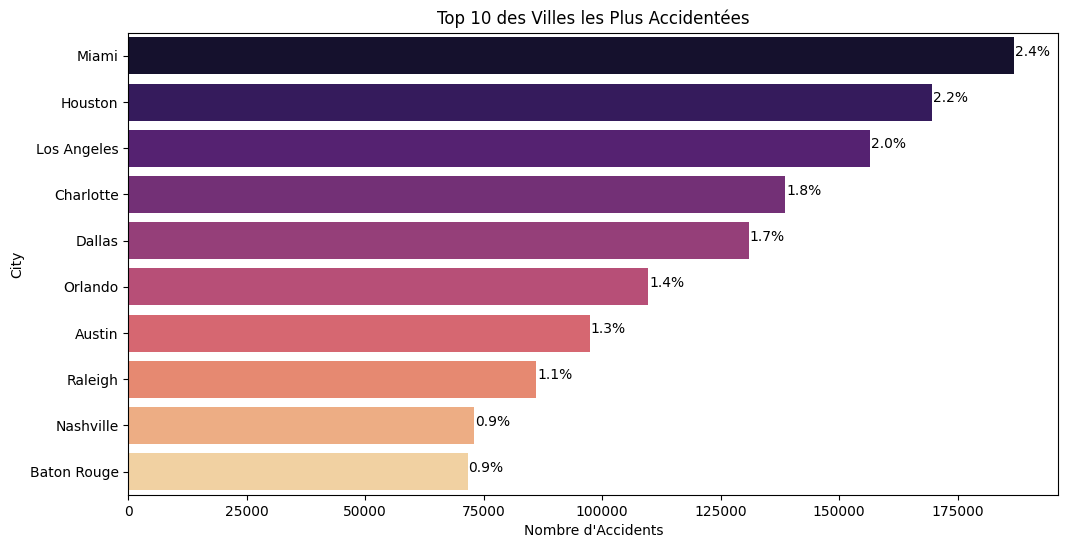

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcul des Tops Villes
city_counts = df['City'].value_counts()
top_10_cities = city_counts.head(10)
total_accidents = len(df)

# Visualisation
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    x=top_10_cities.values,
    y=top_10_cities.index,
    hue=top_10_cities.index,
    palette='magma',
    legend=False
)

plt.title('Top 10 des Villes les Plus Accidentées')
plt.xlabel("Nombre d'Accidents")

# Annotation des pourcentages
for i, p in enumerate(ax.patches):
    percentage = '{:.1f}%'.format(100 * p.get_width() / total_accidents)
    x = p.get_width() + 200
    y = p.get_y() + p.get_height()/2
    ax.annotate(percentage, (x, y))

plt.show()

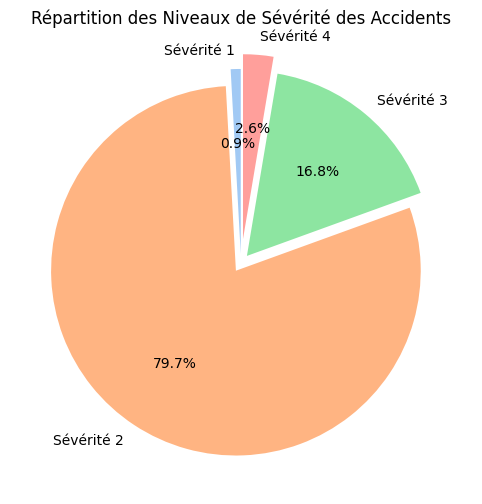

In [4]:
severity_counts = df['Severity'].value_counts(normalize=True).sort_index() * 100

plt.figure(figsize=(8, 6))
colors = ['#66b3ff','#99ff99','#ffcc99','#ff9999']
explode = (0.05, 0.05, 0.05, 0.13)  # Mettre en valeur la Sévérité 4

plt.pie(severity_counts, labels=[f'Sévérité {i}' for i in severity_counts.index],
        autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'), explode=explode)
plt.title('Répartition des Niveaux de Sévérité des Accidents')
plt.show()

Résultat du Test Chi-2 : p-value = 0.0000e+00


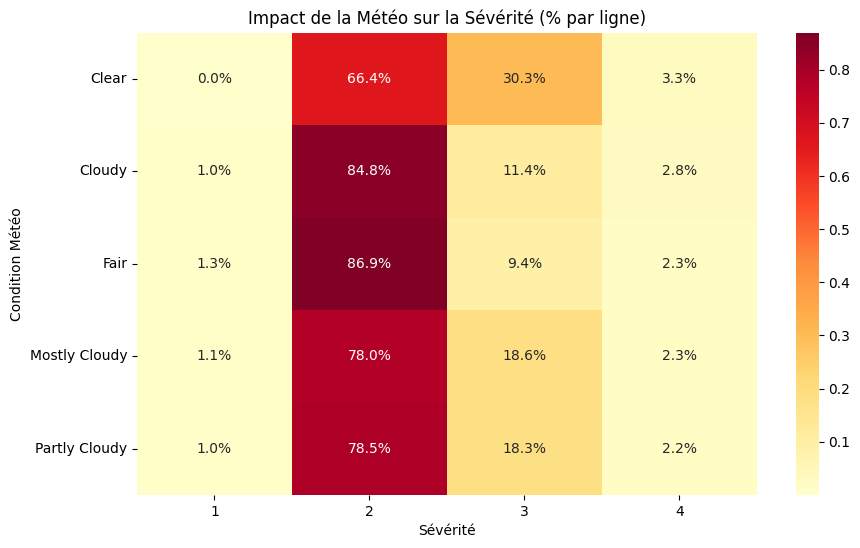

In [5]:
from scipy import stats

# Préparation : On ne garde que les conditions fréquentes pour la fiabilité du test
top_weather = df['Weather_Condition'].value_counts().head(5).index
df_weather = df[df['Weather_Condition'].isin(top_weather)]

# Tableau de contingence
contingency_table = pd.crosstab(df_weather['Weather_Condition'], df_weather['Severity'])

# Test du Chi-2
chi2, p_val, dof, expected = stats.chi2_contingency(contingency_table)

print(f"Résultat du Test Chi-2 : p-value = {p_val:.4e}")

# Visualisation Heatmap de la contingence (normalisée par ligne pour voir les proportions)
plt.figure(figsize=(10, 6))
sns.heatmap(pd.crosstab(df_weather['Weather_Condition'], df_weather['Severity'], normalize='index'), annot=True, fmt='.1%', cmap='YlOrRd')
plt.title('Impact de la Météo sur la Sévérité (% par ligne)')
plt.xlabel('Sévérité')
plt.ylabel('Condition Météo')
plt.show()

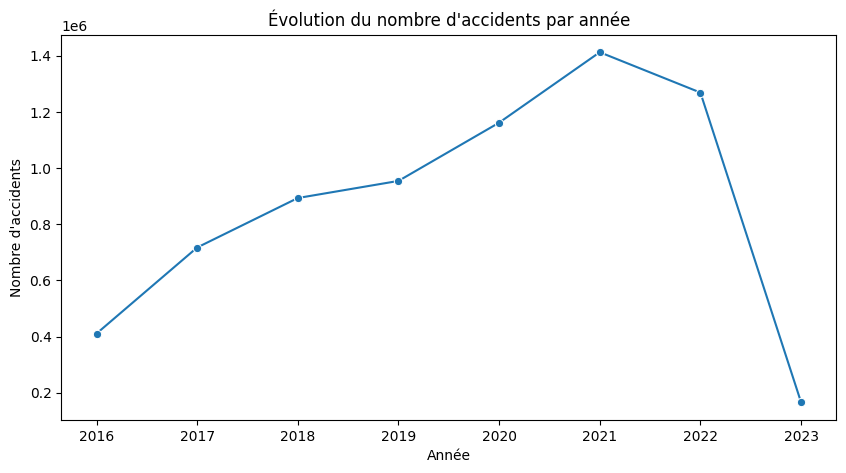

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')
df['Year'] = df['Start_Time'].dt.year
df['Month'] = df['Start_Time'].dt.month
df['Hour'] = df['Start_Time'].dt.hour
df['DayOfWeek'] = df['Start_Time'].dt.day_name()
#Répartition par ANNÉE
accidents_year = df['Year'].value_counts().sort_index()
plt.figure(figsize=(10,5))
sns.lineplot(x=accidents_year.index, y=accidents_year.values, marker='o')
plt.title("Évolution du nombre d'accidents par année")
plt.xlabel("Année")
plt.ylabel("Nombre d'accidents")
plt.show()

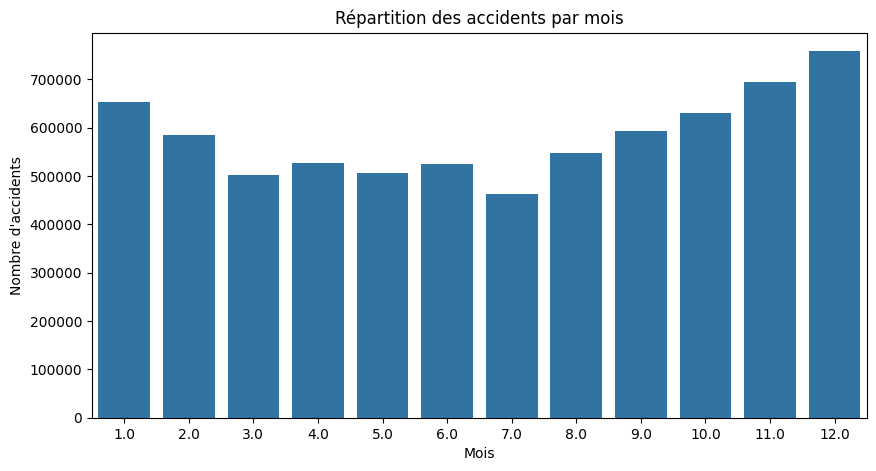

In [7]:
#Répartition par MOIS
accidents_month = df['Month'].value_counts().sort_index()
plt.figure(figsize=(10,5))
sns.barplot(x=accidents_month.index, y=accidents_month.values)
plt.title("Répartition des accidents par mois")
plt.xlabel("Mois")
plt.ylabel("Nombre d'accidents")
plt.show()

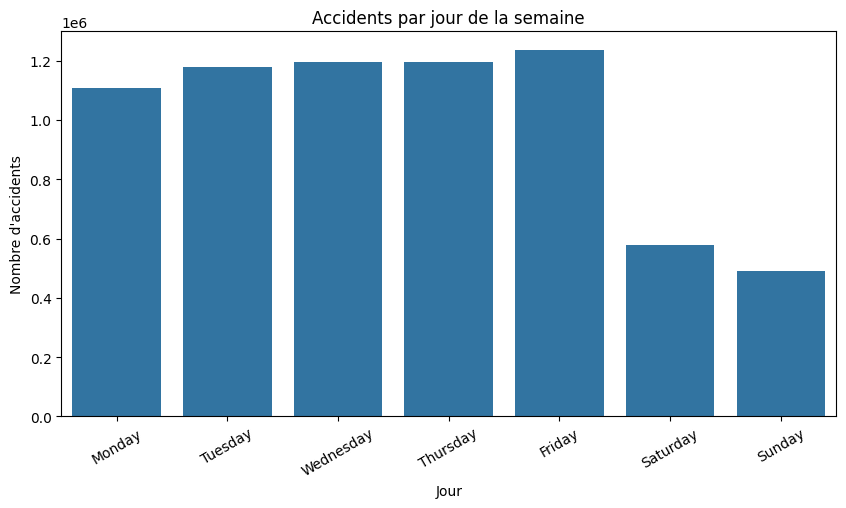

In [8]:
#Répartition par JOUR DE LA SEMAINE
order_days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
accidents_day = df['DayOfWeek'].value_counts().reindex(order_days)

plt.figure(figsize=(10,5))
sns.barplot(x=accidents_day.index, y=accidents_day.values)
plt.title("Accidents par jour de la semaine")
plt.xlabel("Jour")
plt.ylabel("Nombre d'accidents")
plt.xticks(rotation=30)
plt.show()

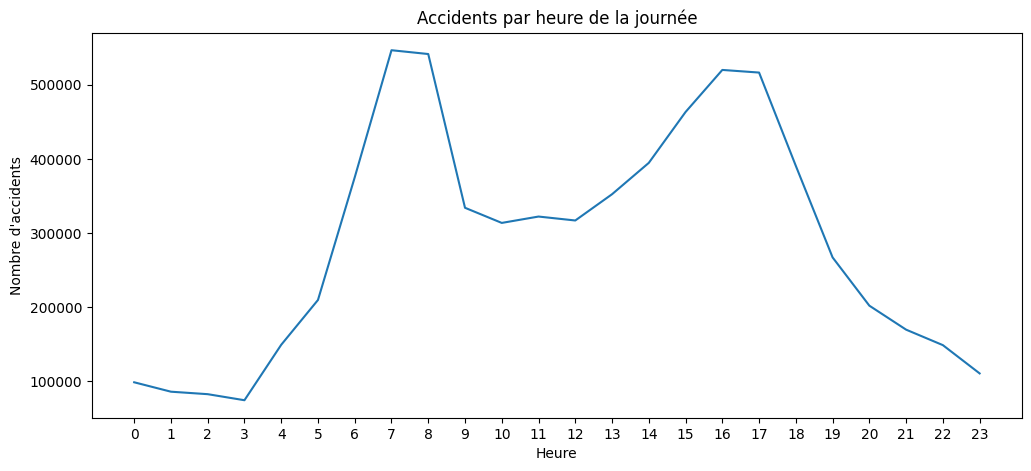

In [9]:
#Répartition par HEURE
accidents_hour = df['Hour'].value_counts().sort_index()

plt.figure(figsize=(12,5))
sns.lineplot(x=accidents_hour.index, y=accidents_hour.values)
plt.title("Accidents par heure de la journée")
plt.xlabel("Heure")
plt.ylabel("Nombre d'accidents")
plt.xticks(range(0,24))
plt.show()

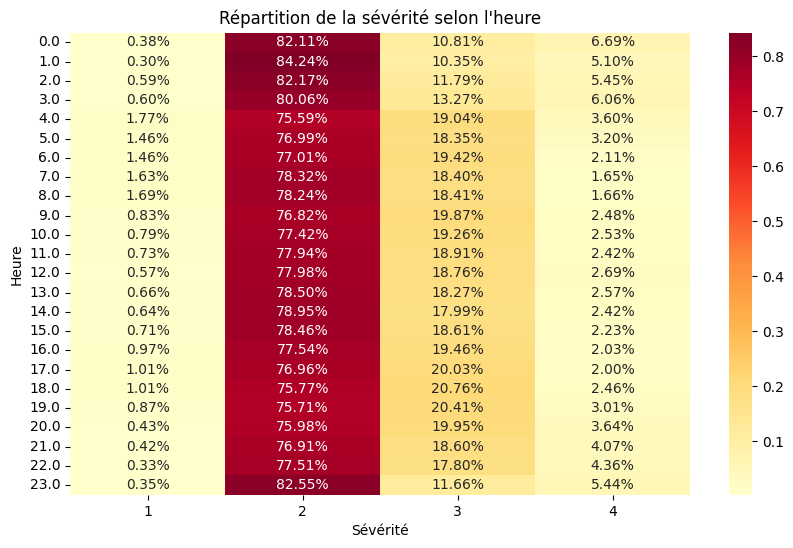

In [10]:
#HEURE × SÉVÉRITÉ
hour_severity = pd.crosstab(df['Hour'], df['Severity'], normalize='index')

plt.figure(figsize=(10,6))
sns.heatmap(hour_severity, annot=True, fmt=".2%", cmap="YlOrRd")
plt.title("Répartition de la sévérité selon l'heure")
plt.xlabel("Sévérité")
plt.ylabel("Heure")
plt.show()